In [34]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels as sm
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt    
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [35]:
#read CSV file
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Project-Housing_splitted\train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [36]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [37]:
data.shape

(1168, 81)

In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

most of data are object and integer and few are float type data,count of data is less in few cloumns  means missing values ,NAN presnt in dataset

In [39]:
#to check NaN dataset
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [40]:
#unique data type
data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [41]:
Catgorical_data=data[['Street','MSZoning','LotShape','LandContour','Utilities','LotConfig','RoofStyle','Condition1','Condition2','HouseStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageQual','SaleType']]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

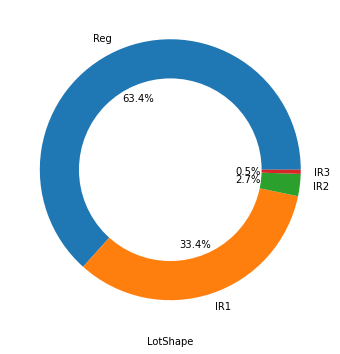

<Figure size 432x288 with 0 Axes>

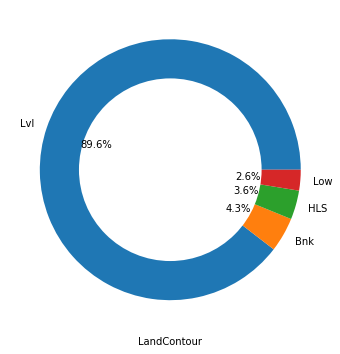

<Figure size 432x288 with 0 Axes>

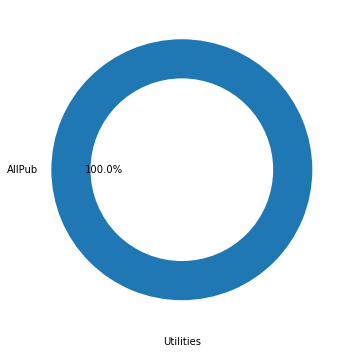

<Figure size 432x288 with 0 Axes>

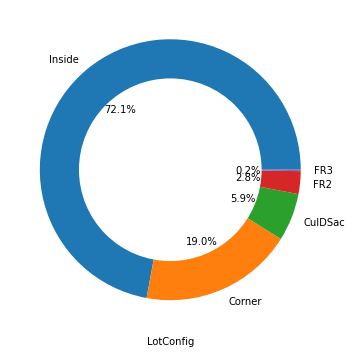

<Figure size 432x288 with 0 Axes>

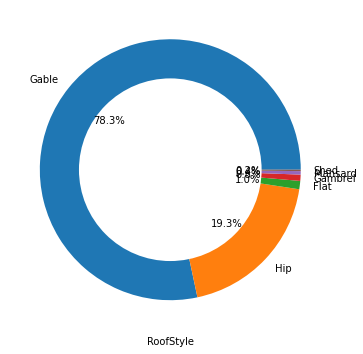

<Figure size 432x288 with 0 Axes>

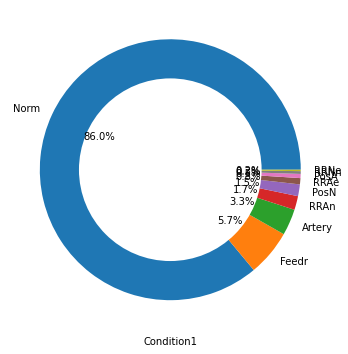

<Figure size 432x288 with 0 Axes>

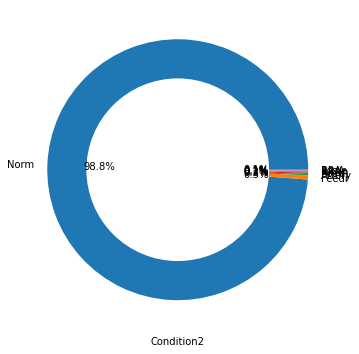

<Figure size 432x288 with 0 Axes>

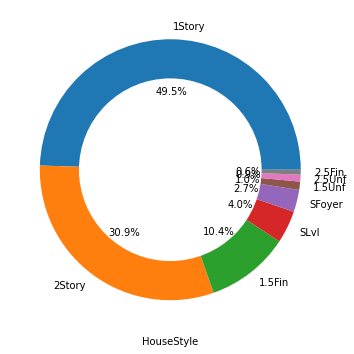

<Figure size 432x288 with 0 Axes>

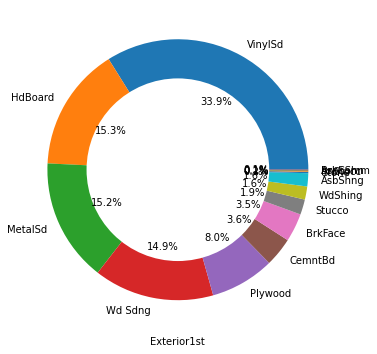

<Figure size 432x288 with 0 Axes>

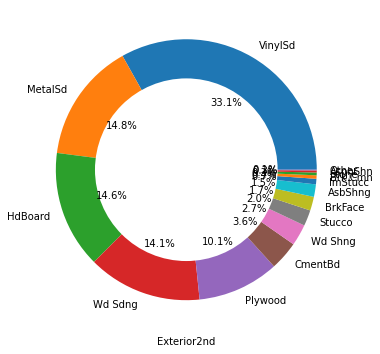

<Figure size 432x288 with 0 Axes>

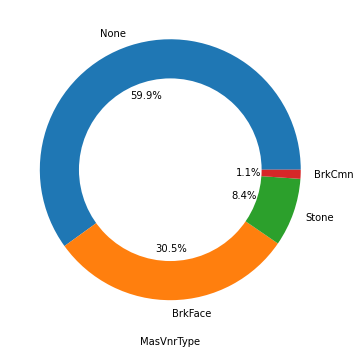

<Figure size 432x288 with 0 Axes>

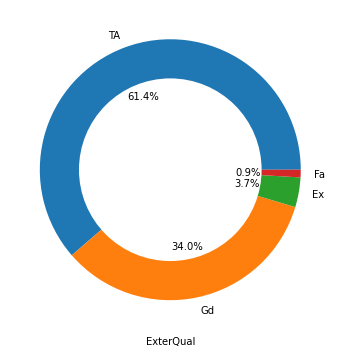

<Figure size 432x288 with 0 Axes>

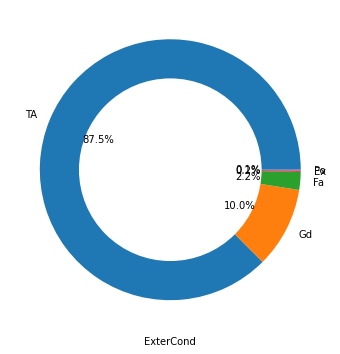

<Figure size 432x288 with 0 Axes>

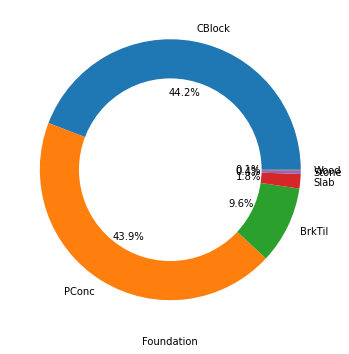

<Figure size 432x288 with 0 Axes>

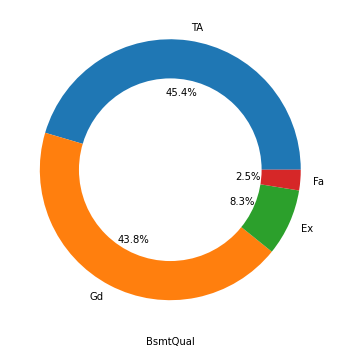

<Figure size 432x288 with 0 Axes>

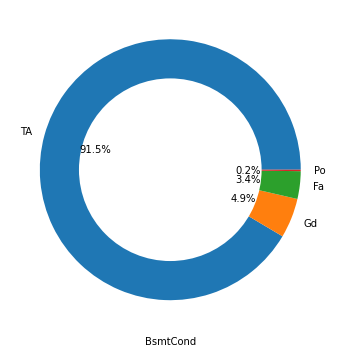

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

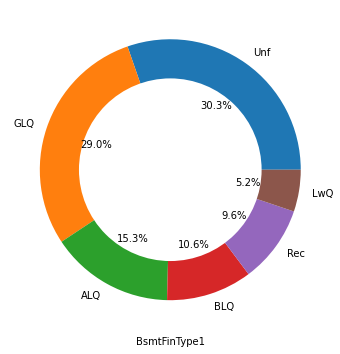

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

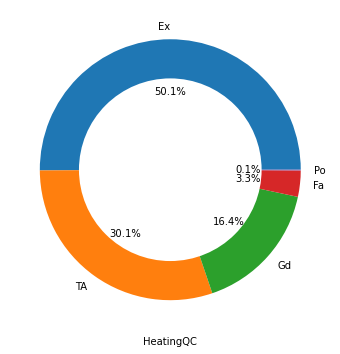

<Figure size 432x288 with 0 Axes>

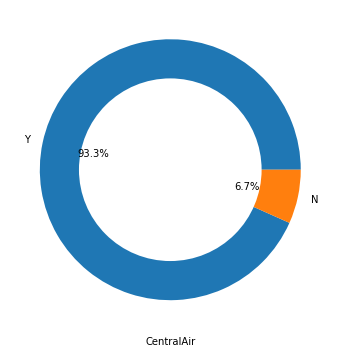

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

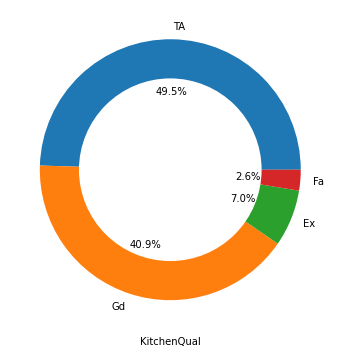

<Figure size 432x288 with 0 Axes>

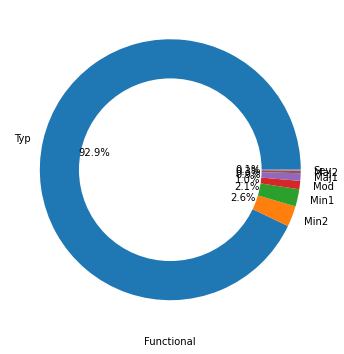

<Figure size 432x288 with 0 Axes>

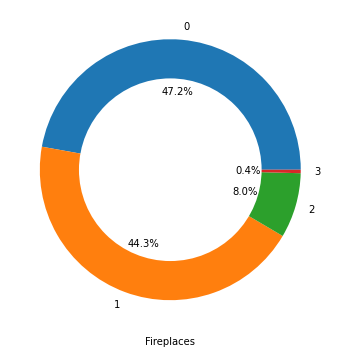

<Figure size 432x288 with 0 Axes>

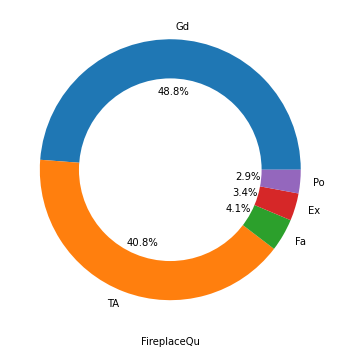

<Figure size 432x288 with 0 Axes>

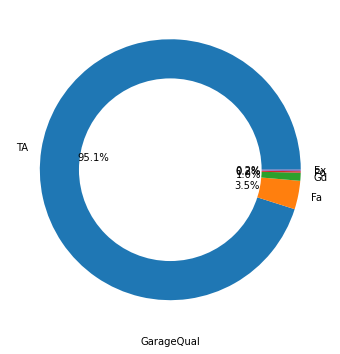

<Figure size 432x288 with 0 Axes>

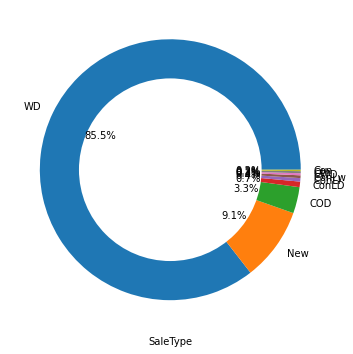

<Figure size 432x288 with 0 Axes>

In [42]:
#piechart analysis for object data
for i in Catgorical_data:
        plt.figure(figsize=(8,6))
        Catgorical_data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()
        

In [43]:
#drop  columns which have more than 80 % null values and ID column nominal data
data.drop(columns=['Id','PoolQC', 'Fence', 'MiscFeature','Alley'],axis=1,inplace=True)

In [44]:
data.shape

(1168, 76)

In [45]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260   
std      30.145255     20.785185   182.595606   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000   
mean       2.884418      1.045377      6.542808     0.617295  1978.193841   
std        0.817229      0.216292      1.598484     0.650575    24.890704   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

LotArea ,MasVnrArea, BsmtFinSF1,1ndFlrS, 2ndFlrSF,GrLivArea,WoodDeckSF,GarageArea ,MiscVal,  have higher standard deviation ,few columns have 0 minimum values

In [46]:
#Fill  missing data NaN values
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [47]:
#unique value count inside dataset
data.nunique()

MSSubClass        15
MSZoning           5
LotFrontage      107
LotArea          892
Street             2
LotShape           4
LandContour        4
Utilities          1
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        110
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       14
Exterior2nd       15
MasVnrType         4
MasVnrArea       284
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       551
BsmtFinType2       6
BsmtFinSF2       122
BsmtUnfSF        681
TotalBsmtSF      636
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
1stFlrSF         669
2ndFlrSF         351
LowQualFinSF      21
GrLivArea        746
BsmtFullBath       4
BsmtHalfBath       3
FullBath     

In [48]:
#so now convert all object data in numerical value with encoding 
from sklearn.preprocessing import OrdinalEncoder

In [49]:
ord=OrdinalEncoder()

In [50]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=ord.fit_transform(data[i].values.reshape(-1,1))
    

In [51]:
data.shape

(1168, 76)

In [52]:
#split dataset into parts to see visualization 
data1=data.iloc[::,0:38]
data2=data.iloc[::,38:76]

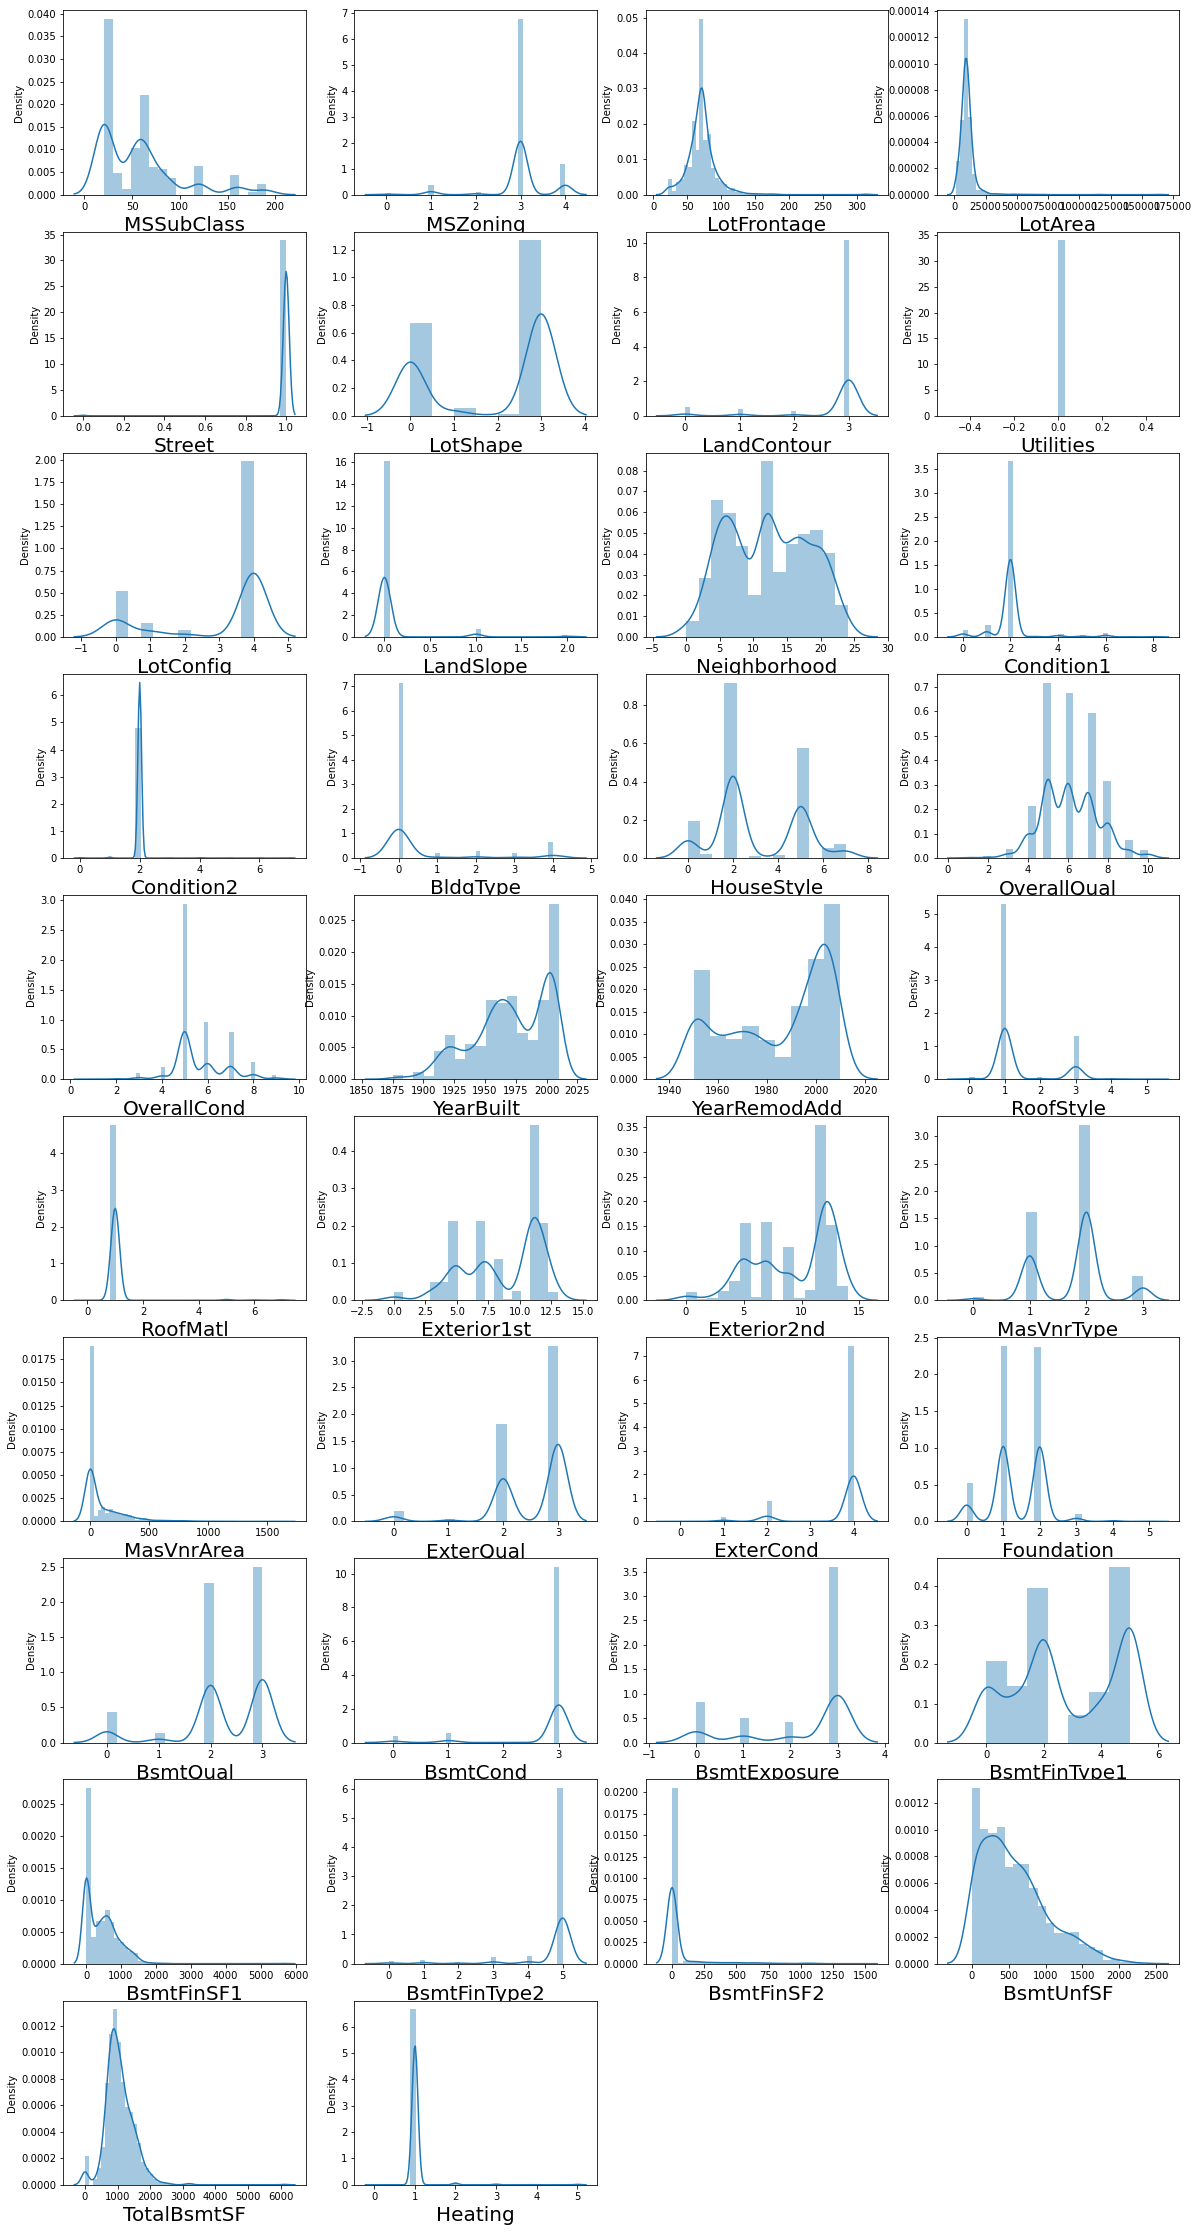

In [53]:
#Visualization of data distribution of data1 dataset which i have taken from original dataset 

plt.figure(figsize=(20,40))
plotnumber=1
for column in data1:
    if plotnumber<=38:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

LotArea ,BsmtUnfSF, TotalBsmtSF,BsmtFinSF1,MSSubClass continous data right skewed

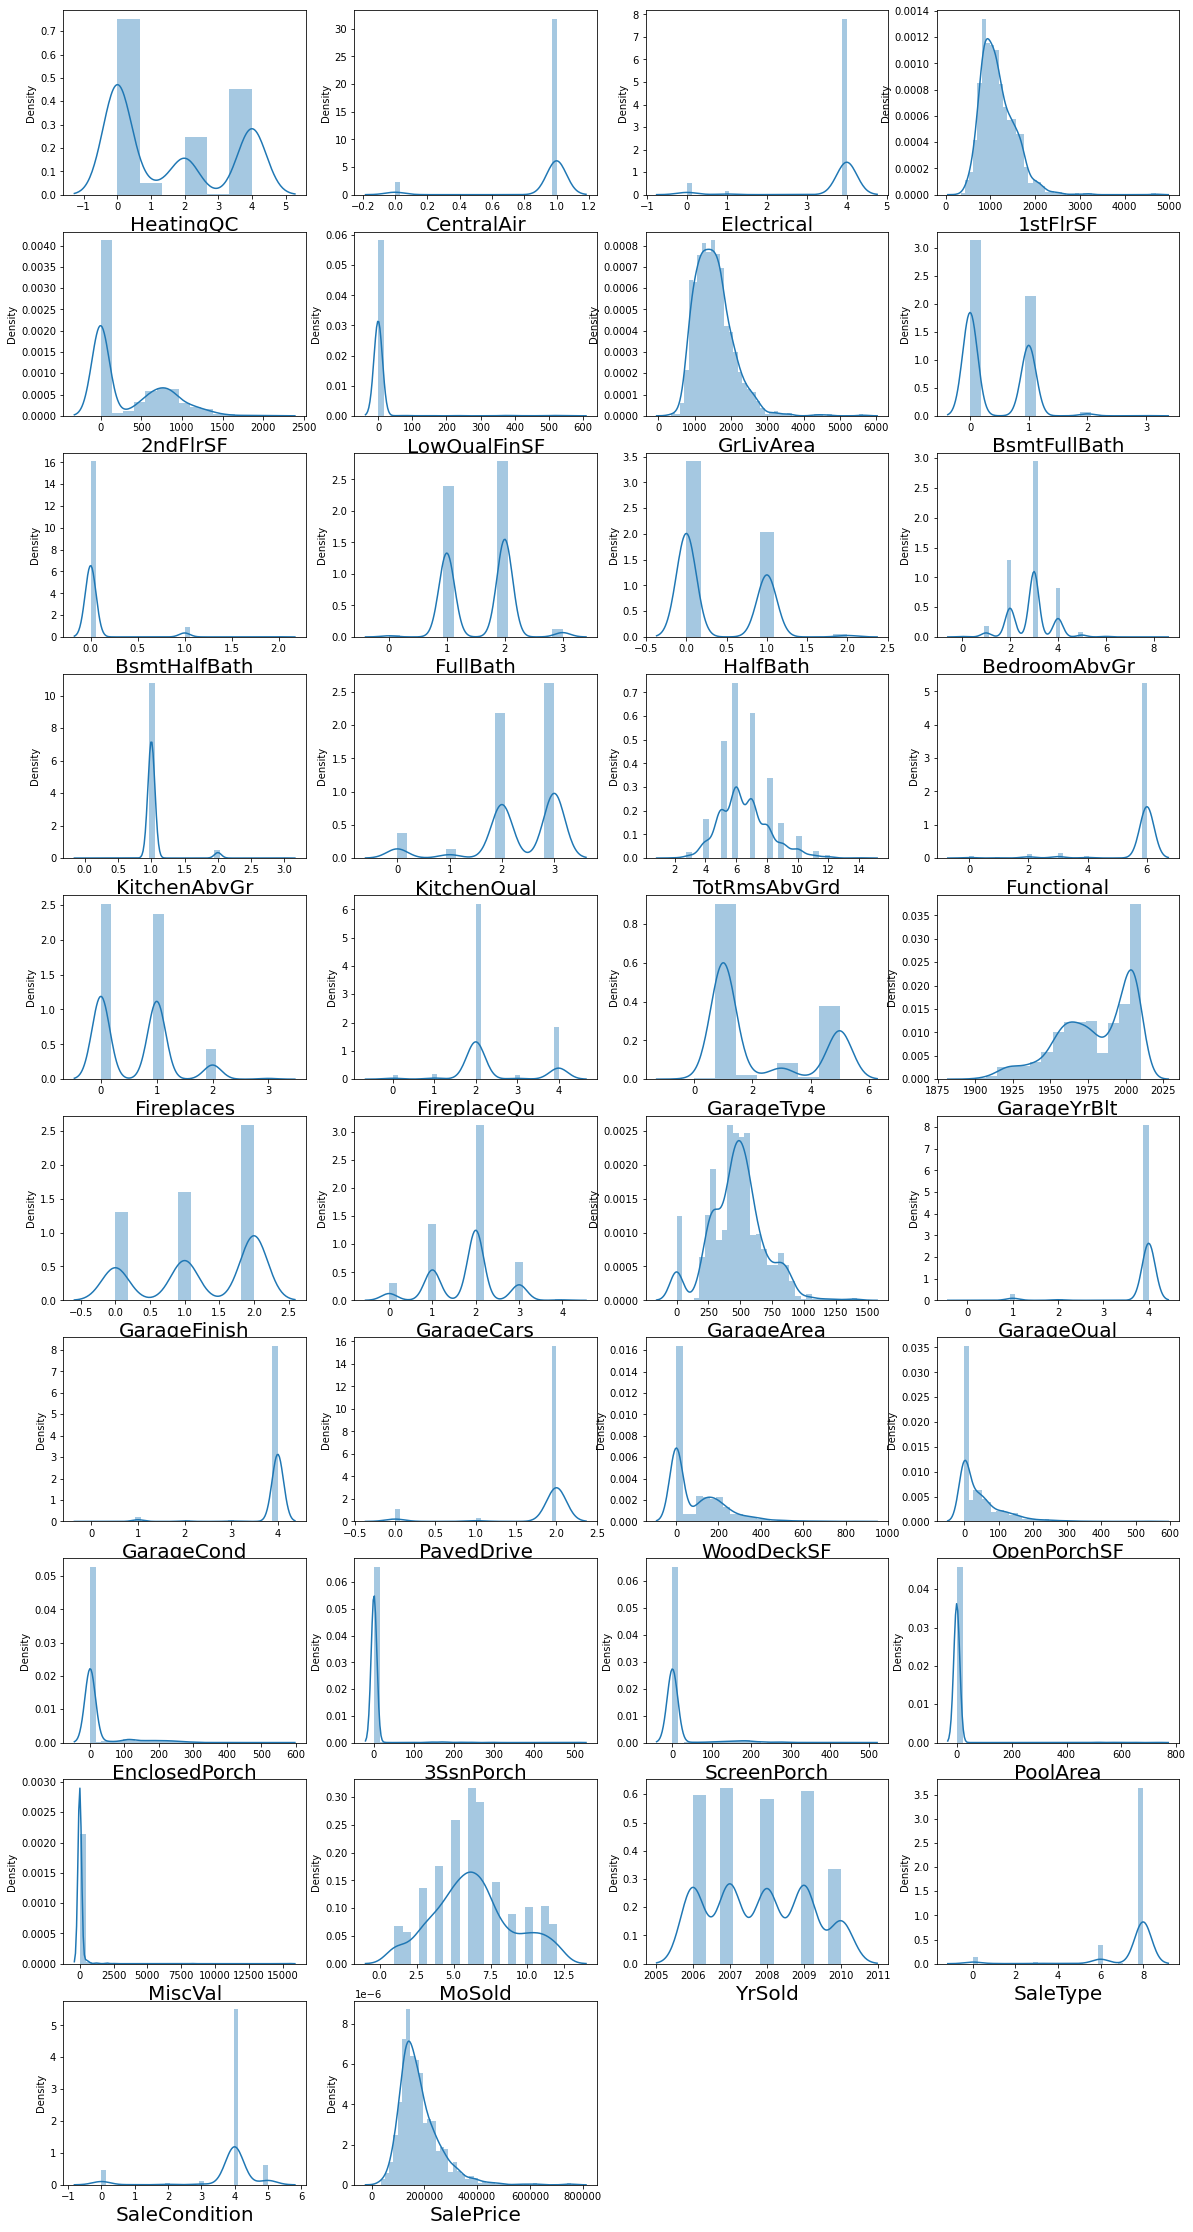

In [54]:
#Visualization of data distribution of insur1 dataset which i have taken from orininal dataset 

plt.figure(figsize=(20,40))
plotnumber=1
for column in data2:
    if plotnumber<=38:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

1stFlr,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenporchSF,Enclosed Porch,3SsnPorch,ScreenPorch,PoolArea,MiscVal, are right skewed

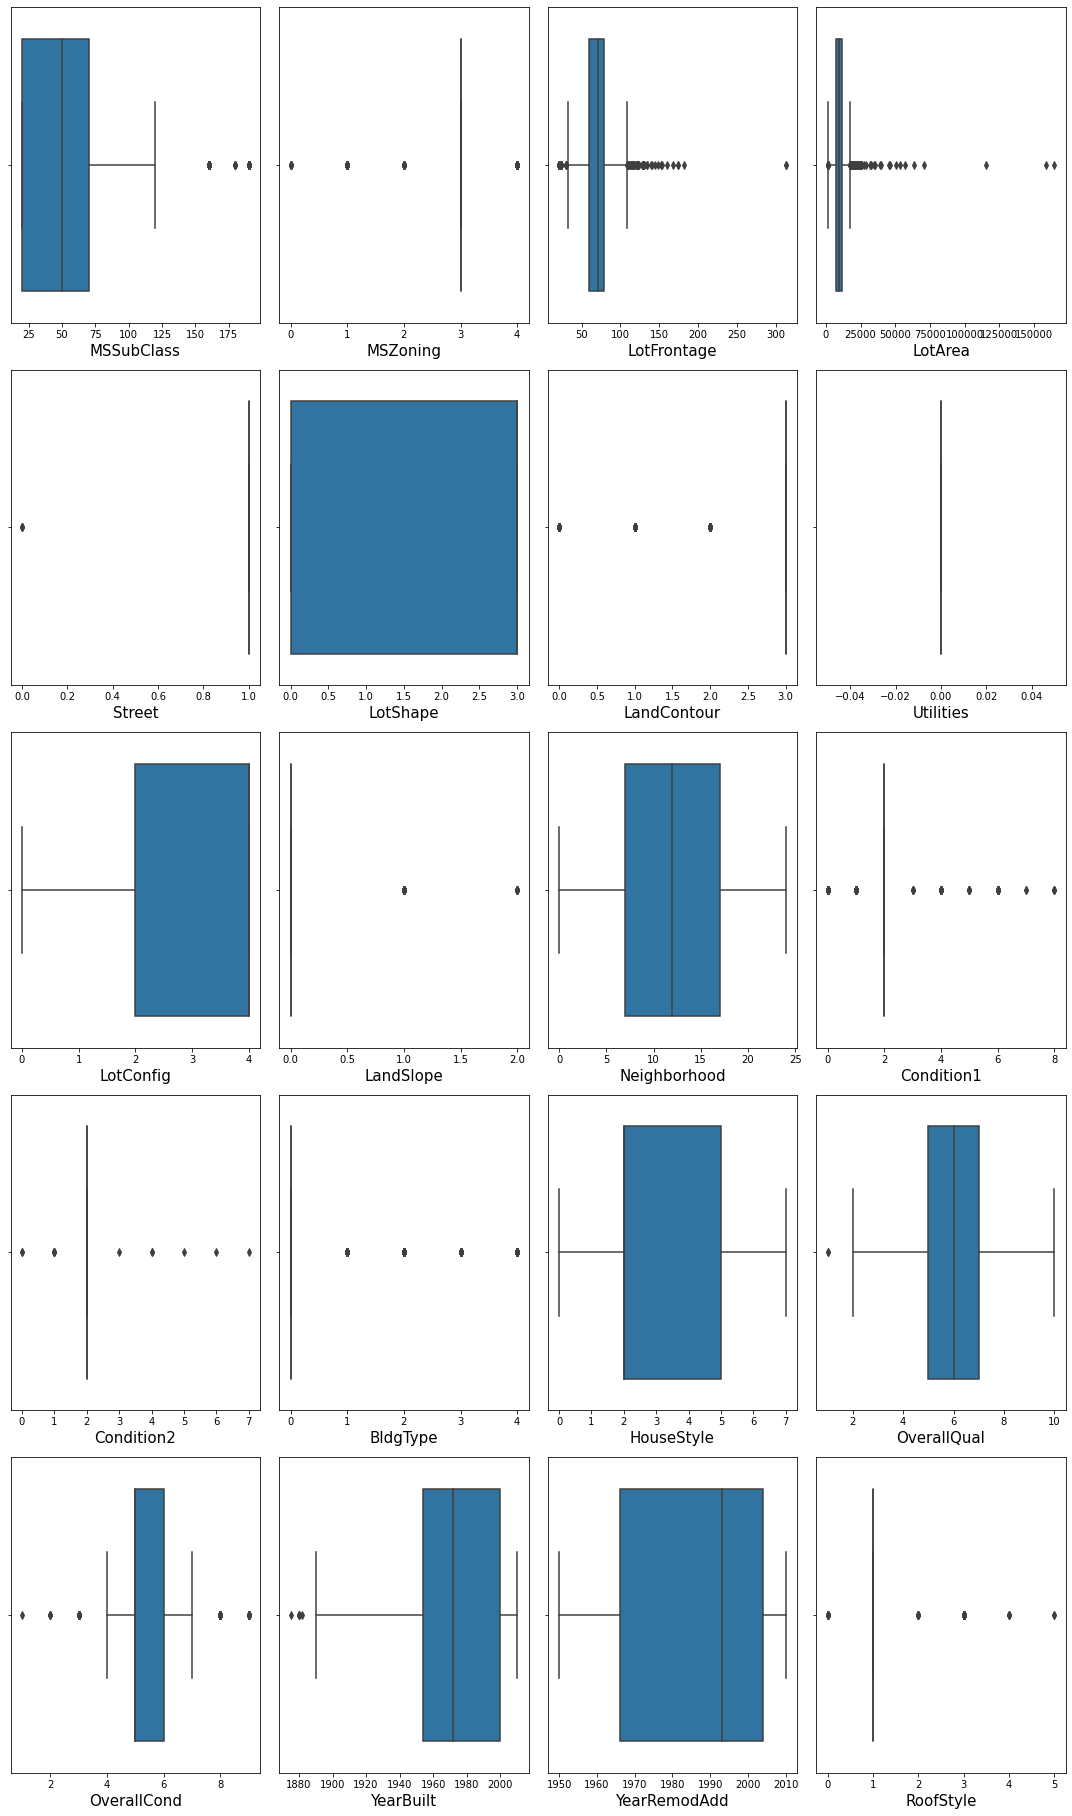

In [55]:
#Visualize the outliers using boxplot first dataset data1
plt.figure(figsize=(15,50))
graph=1
for column in data1:
    if graph<=20:
        ax=plt.subplot(10,4,graph)
        ax=sns.boxplot(data1[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

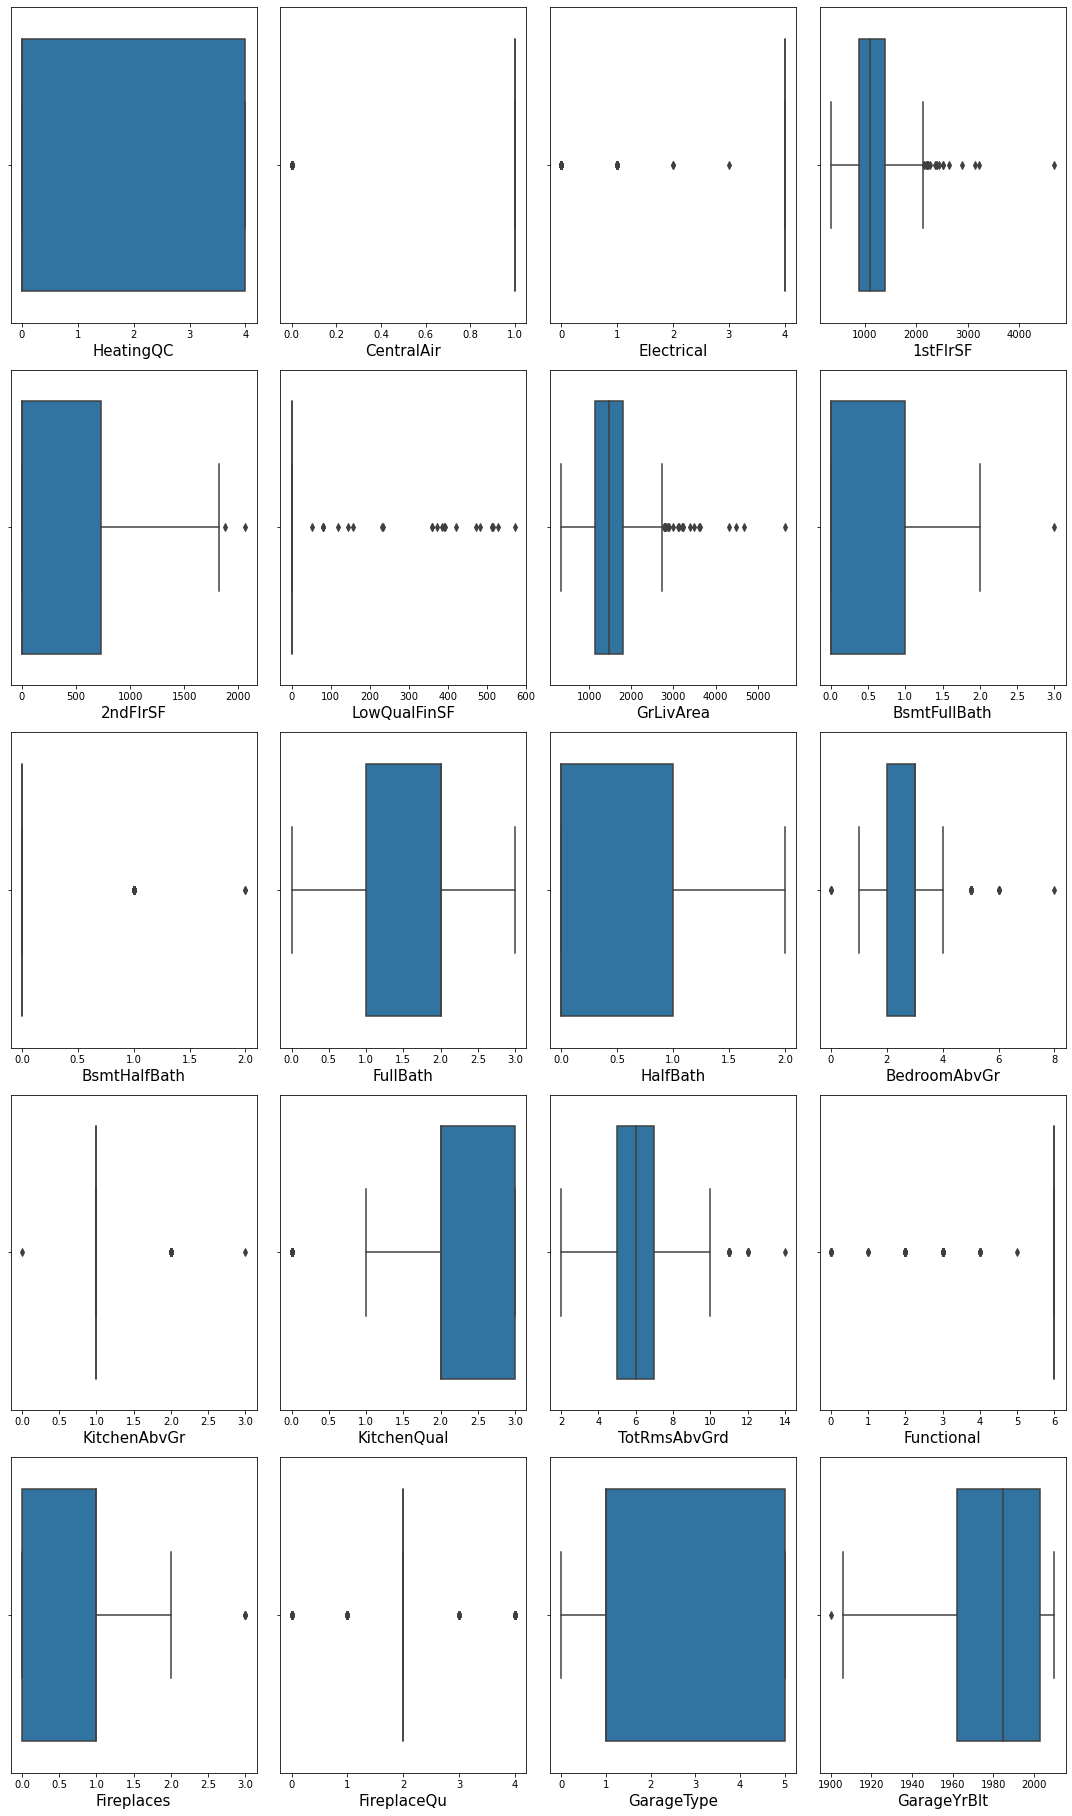

In [56]:
#Visualize the outliers using boxplot first dataset data1
plt.figure(figsize=(15,50))
graph=1
for column in data2:
    if graph<=20:
        ax=plt.subplot(10,4,graph)
        ax=sns.boxplot(data2[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

many outliers present in dataset

In [57]:
#lets see Plotting Heatmap(Correlation matrix) in data1 set to check multicollinearity
df_corr=data1.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='BsmtFinType2', ylabel='BsmtFinSF2'>

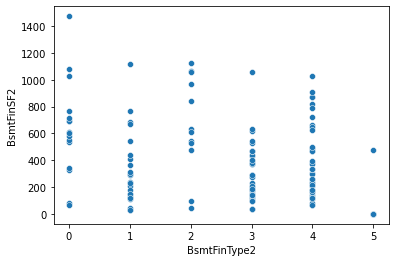

In [58]:
#scatter plot to check correlation
sns.scatterplot(x='BsmtFinType2',y='BsmtFinSF2',data=data1)

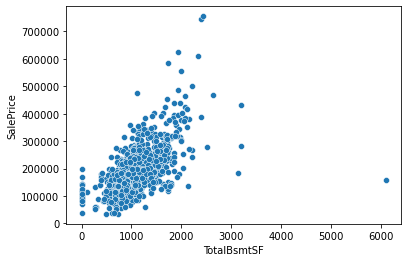

In [102]:
sns.scatterplot(x = 'TotalBsmtSF', y='SalePrice', data = data)
plt.show()

totalBsmtSF shows  relationship with class i.e. SalePrice

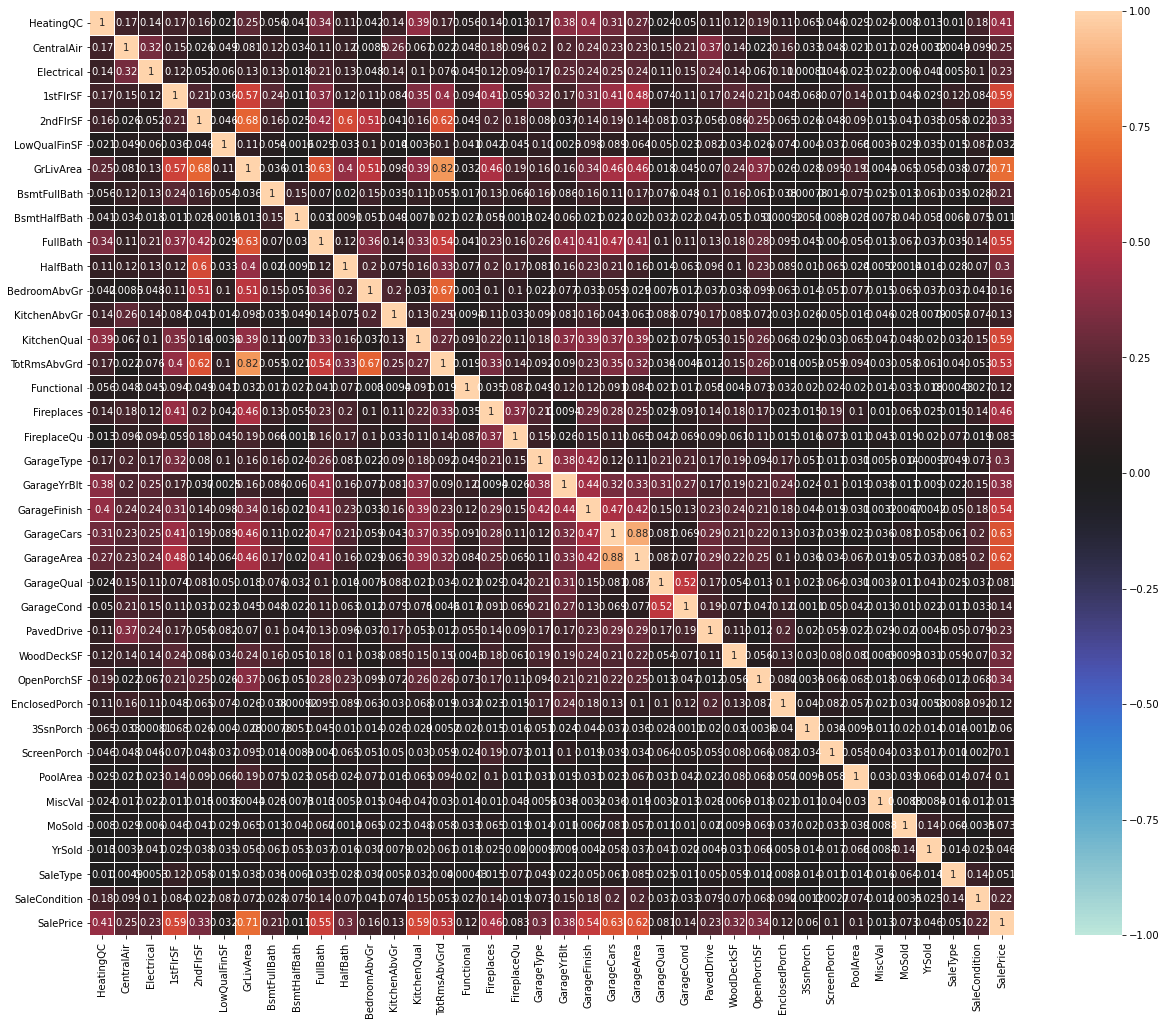

In [59]:
#lets see Plotting Heatmap(Correlation matrix) data2 to check multicollinearity
df_corr=data2.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

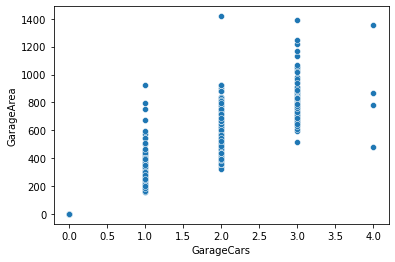

In [60]:
sns.scatterplot(x='GarageCars',y='GarageArea',data=data2)

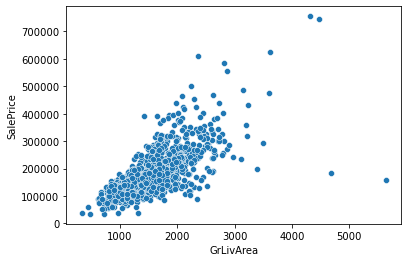

In [99]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = data2)
plt.show()

GrLiveArea shows relationship with SalePrice

In [61]:
#check how much correlation with Saleprice
corr_matrix=data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.381997
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

<AxesSubplot:title={'center':'correlation with target'}>

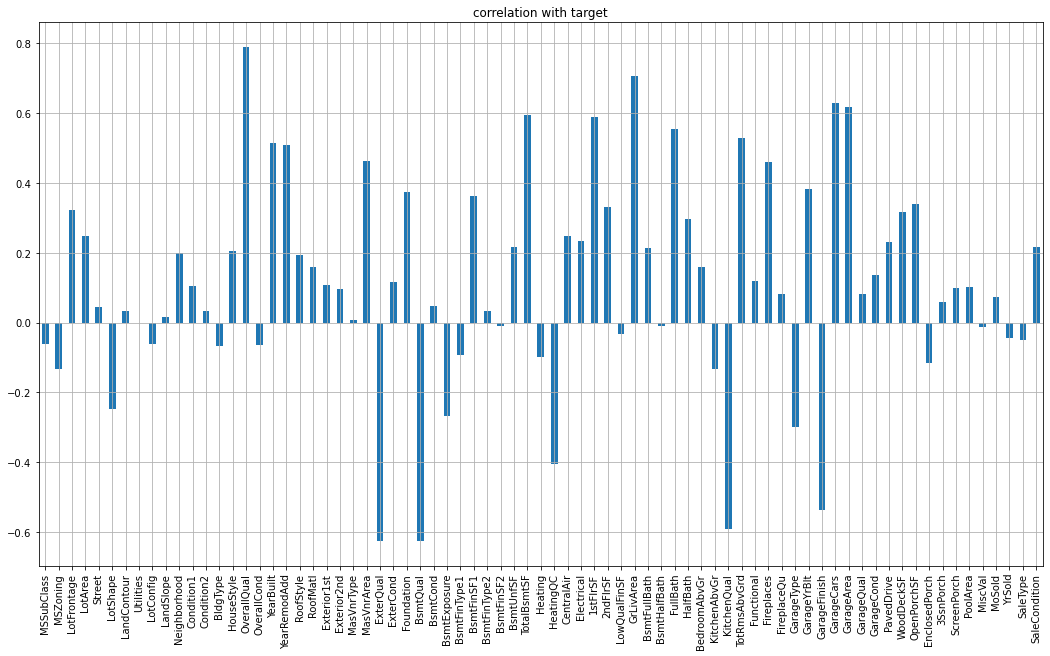

In [64]:
#take same data and visualize the correlation with class 
data.drop('SalePrice',axis=1).corrwith(data.SalePrice).plot(kind='bar',grid=True,figsize=(18,10),
                                                 title='correlation with target')

In [65]:
scaler=StandardScaler()
x=data.drop('SalePrice',axis=1)
x_scaled=scaler.fit_transform(x)  

In [66]:
pca=PCA()   #PCA reduce features  ,when its apply mean is0
pca.fit_transform(x_scaled)  #features selection by screep graph and plot

array([[-4.97380972e-01, -1.53277032e+00, -1.52134273e+00, ...,
         4.47169403e-15,  6.40533182e-15, -8.58297090e-16],
       [ 3.10890812e+00,  4.01489515e-01,  5.32337841e+00, ...,
        -1.34160578e-15, -2.36319069e-16,  8.11666388e-17],
       [ 2.83510831e+00,  1.41801376e-01,  5.08089826e-01, ...,
        -1.60535370e-14,  3.92471325e-15, -4.27930742e-16],
       ...,
       [-9.16578075e-01, -3.06864574e-01, -1.32179506e+00, ...,
        -1.15435641e-15, -2.02223222e-16,  9.97631796e-17],
       [-6.24602742e+00,  3.49734325e+00, -1.91570789e-01, ...,
        -1.19985679e-15, -2.14600043e-16,  1.03572571e-16],
       [ 2.15288692e+00, -1.65231612e-01, -1.67994438e+00, ...,
        -1.83284443e-16,  2.88189912e-17, -4.27459233e-18]])

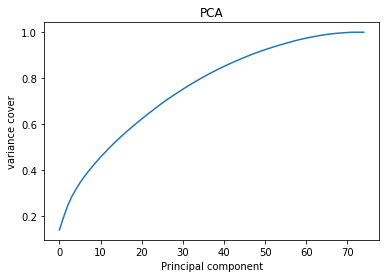

In [67]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('variance cover')        #this screep plot give idea to selct top 95% faetures only
plt.title('PCA')
plt.show()

as per screep plot  all data have to use to build modelPrincipl component 

In [68]:
#seprate featurs and label
Y=data.SalePrice
X=data.drop(columns='SalePrice',axis=1)

In [69]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# LinearRegression Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred=Lr.predict(x_test)

In [73]:
Lr.score(x_train,y_train)

0.869455483225075

In [74]:
mean_absolute_error(y_test,y_pred)

21761.505653546807

In [75]:
mean_squared_error(y_test,y_pred)

2850623092.0937643

oh so error is quite high lets do regularization of model and see what can i do

# Hyperparameter Tuning of LR

In [76]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [77]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)# aplha is learning rate ,max_iter means how many time appear in 
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [78]:
alpha=lassocv.alpha_
alpha

76.32868795814372

In [79]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=76.32868795814372)

In [80]:
lasso_reg.score(x_test,y_test)

0.6285127265766954

In [81]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [82]:
ridgecv.alpha_

0.09099999999999998

In [83]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [84]:
ridge_l1.score(x_test,y_test)

0.6237412027046987

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
cross_val_score(ridge_l1,X_scaler,Y,cv=5).mean()

0.741700055248016

In [87]:
cross_val_score(lasso_reg,X_scaler,Y,cv=5).mean()

0.7461523104951849

cross validation score of both model is high compare to model after tuning 

In [88]:
#lets try with Adaboost and build the model
from sklearn.ensemble import AdaBoostRegressor

In [89]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [90]:
ada.score(x_train,y_train)

0.8676192755021351

In [91]:
#model prediction on train data
y_pred=ada.predict(x_train)

In [92]:
print('R square score',r2_score(y_train,y_pred))

R square score 0.8676192755021351


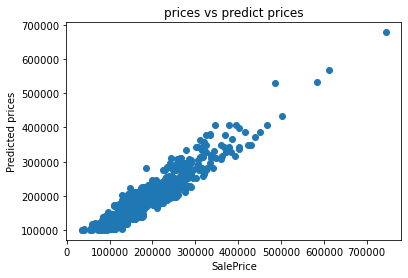

In [93]:
#plotting actual vs predicted with scatter plot to vizualize 
plt.scatter(y_train,y_pred)
plt.xlabel('SalePrice')
plt.ylabel('Predicted prices')
plt.title('prices vs predict prices')
plt.show()

In [94]:
#this following a trend with actual vs pridicted as linear increasing 

#predicting test data with model
y_test_pred=ada.predict(x_test)

In [95]:
#model evaluation
accuracy= r2_score(y_test,y_test_pred)
print('R square score:', accuracy)

R square score: 0.7586672879358567


In [96]:
cross_val_score(ada,X_scaler,Y,cv=5).mean()

0.7855601667253108

# HYper parameter tuning with randomizedsearchCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.tree import DecisionTreeRegressor

In [98]:
params={'n_estimators':[40,47,49,50],'learning_rate':[0.3,.4,.45]}

In [148]:
rnd_search=RandomizedSearchCV(estimator=ada,param_distributions=params,cv=5)

In [149]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [150]:
rnd_search.best_params_

{'n_estimators': 50, 'learning_rate': 0.4}

In [151]:
ada=AdaBoostRegressor(base_estimator=ada,learning_rate=0.3,n_estimators=50)

In [152]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=AdaBoostRegressor(), learning_rate=0.3)

In [153]:
y_pred=ada.predict(x_test)

In [154]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.7879125071983865


In [157]:
ada.score(x_train,y_train)

0.8873532060436268

In [156]:
cross_val_score(ada,X_scaler,Y,cv=5).mean()

0.8230099793190526

# Decision Tree Regression

In [61]:
#model building with Decesion tree 
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
dt.score(x_test,y_test)

0.5663952047538168

# Hyperparamter tuning ofDecesion Tree model

In [64]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [65]:
grid_search=RandomizedSearchCV(estimator=dt,param_distributions=parametrs,cv=5)

In [66]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': range(1, 20, 2),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 16, 2),
                                        'min_weight_fraction_leaf': [0.01, 0.02,
                                                                     0.1, 1]})

In [67]:
grid_search.best_params_

{'min_weight_fraction_leaf': 0.02,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_depth': 9,
 'criterion': 'mse'}

In [68]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=15,min_samples_leaf=8,min_samples_split=10,min_weight_fraction_leaf=0.01)

In [69]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=8, min_samples_split=10,
                      min_weight_fraction_leaf=0.01)

In [70]:
dt.score(x_train,y_train)

0.8687622628924587

In [71]:
y_pred=dt.predict(x_test)

In [72]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.7635308445725317


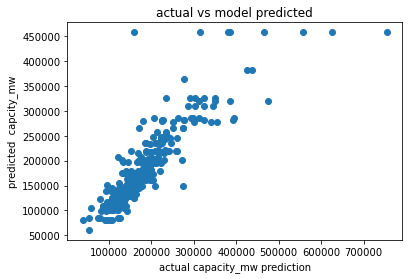

In [73]:
#Visualization of actual vs predicted capacity_mw
plt.scatter(y_test,y_pred)
plt.xlabel('actual capacity_mw prediction')
plt.ylabel('predicted  capcity_mw')
plt.title('actual vs model predicted')
plt.show()

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(dt,X_scaler,Y,cv=7).mean()

0.7200066821580736

as per CV score model is slightly overfitted 

# GradientBoosting Regression

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)model 

GradientBoostingRegressor()

In [78]:
gbr.score(x_train,y_train)

0.9719801869518147

In [80]:
#cross validation of model
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.8677098723510671

model is slightly overfitted but good score so far

In [81]:
#model evaluation
accuracy= r2_score(y_test,y_test_pred)
print('R square score:', accuracy)

R square score: 0.774973141383907


# HyperParameter tuning of GradientBoost model

In [82]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.001,0.01,0.3],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [83]:
grid=RandomizedSearchCV(gbr,param_distributions=param,cv=5)
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.1, 0.001, 0.01,
                                                          0.3],
                                        'loss': ['ls'],
                                        'n_estimators': [100, 150, 200, 250],
                                        'subsample': [1.0, 2, 3, 4, 7]})

In [84]:
grid.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [85]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1,loss='ls',n_estimators=200,subsample=1)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200, subsample=1)

In [86]:
gbr.score(x_train,y_train)

0.9854715637073801

In [87]:
y_pred=gbr.predict(x_test)

In [88]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.851165582640721


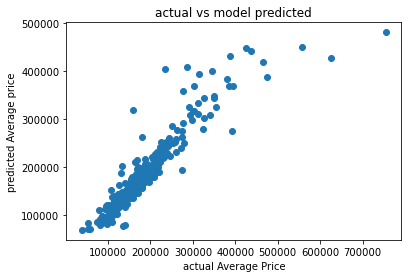

In [89]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Average Price')
plt.ylabel('predicted Average price')
plt.title('actual vs model predicted')
plt.show()

so as per scatter model this model seems quite  good accuracy

In [91]:
cross_val_score(gbr,X_scaler,Y,cv=3).mean()

0.8795335764671935

In [158]:
#saving model AdaBoost model
import pickle
file='pikle_ada_model'
with open(file ,'wb') as file:
    pickle.dump(ada, file) 